This nootebook show how to use our three NEW metrics  build for the Cadence Note 2021 on Classical variable stars in different Galactic environments: pulsation behaviour recovery.
In short:
-->first simulate the  light curve of a pulsating star (RR, Cepheids, LPV) at a given distance and reddening  a given a specific OpSim with  LcContructor.py. Produce  ascii file with the temporal series and useful flags for the saturation  and detection limit  

-->After that a  preliminary and quick analysis of the temporal series is  performed using:

(1)Lcperiod.py that use Gatspy package (https://arxiv.org/abs/1502.01344) to derive the best period in (interval (period_model- 0.5*period_model,period_model+ 0.5*period_model) ;
(2)and LcFitting.py to perform the fit of phased light curve  with a given numberOfHarmonics. This etric also compute deltamag, deltaamp, chi of the fit  and the dimension of the max distance from two consecutive phases of the light curve in each band and the  number gaps larger than factorForDimensionGap  

For information read the details in each metric and/or please send an email to: 
(marcella.dicriscienzo@inaf.it, silvio.leccia@inaf.it and vittorio.braga@inaf.it



In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from gatspy import periodic
import LcConstructorLAST
import LcPeriod
import LcFittingLAST

Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['fiveSigmaDepth', 'seeingFwhmEff', 'fieldRA', 'skyBrightness', 'night', 'fieldDec', 'observationStartMJD', 'airmass', 'visitExposureTime', 'filter', 'numExposures']
Found 427547 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
179 Observations total at this sky position (All SNR levels)
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
11 12 35 42 37 42
Period of the model:
0.38351388888888893


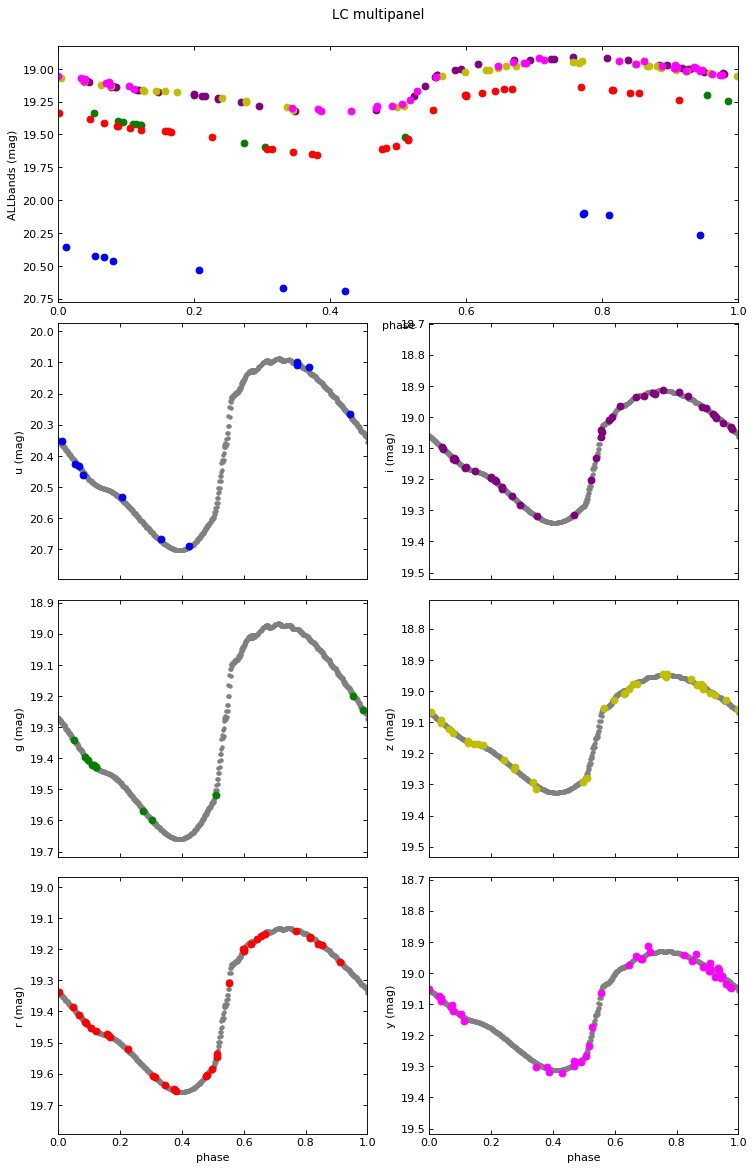

In [15]:

#This cell simulate the temporal series  of a pulsating star  at a given distance
#and reddening and a specific OpSim with LcContructorLAST.py. 
#the output is an  ascii file with the temporal series and useful flags for the saturation
#(computed with saturation_stacker)and detection limit(s/n<5)
#and a multipanel plot with the light curve (otained using the model's period)

#Let's start!
#Insert Ra and Dec of your observations--->
ra=72.000005
dec=-70.933132
#Insert Distance modulus and E(B-V) of the target--->
dm=18.5
ebv=0.08
#Insert Opsim (see in /sims_maf/ for all the available simulations)--->
#runName='baseline_v1.5_10yrs.db'
#path='/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db'
runName='footprint_add_mag_cloudsv1.5_10yrs.db'
path='/sims_maf/fbs_1.5/footprints/footprint_add_mag_cloudsv1.5_10yrs.db'

#Insert start year and finish year of the survey--->
start=0
finish=2
#Insert the template of  variable star (Choose for example RRab.csv,RRc.csv,CEF1.csv,CEF2.csv,LPV1.csv,LPV2.csv)--->
path_ID='./'
modelName='RRc'
modelFileName=modelName+'.csv'
path2=path_ID+modelFileName

#Insert the sigma for the noising--->
sigma_noise=1
#Insert path where figure will be stored if figure=True  (build the directory first)--->
path3='FIGURE/'
figure=True
#Insert path where sciifiles will be stored if ascii=True  (build the directory first--->
path4='FILES/'
optionFile=True
#If this parameter is true the saturated points will be eliminated in the plot (don't change!)
do_remove_saturated=True

label=str(modelName)+'_'+('ra{0:06.2f}dec{1:+06.2f}dm'.format(ra,dec))+str(dm)+'ebv'+str(ebv)+'y'+str(start)+'y'+str(finish)+'_'+str(runName)

#Use LcConstructorLAST.py 
LcTeoLSST,LcTeoLSST_noised,LcTheoric,mv,index_notsaturated=LcConstructorLAST.main(ra,dec,dm,ebv,runName,path,start,finish,path2,sigma_noise,path3,figure,path4,optionFile,modelName,do_remove_saturated,label)
period_model=LcTeoLSST['period']
print('Period of the model:' )
print(period_model)

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.04486863118138895 0.05993405881899481
Finding optimal frequency:
 - Estimated peak width = 0.00875
 - Using 5 steps per peak; omega_step = 0.00175
 - User-specified period range:  0.19 to 0.58
 - Computing periods at 12480 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.38351388888888893
 Period found by Gatpy:
0.38351456183438737
 DeltaP/P (in perc):
6.729454984366612e-07
 DeltaP/P*1/number of cycle:
9.374071248847333e-10


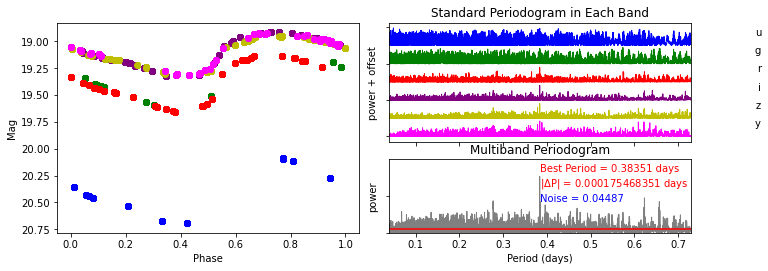

In [14]:
#This cell derive the  period and the noise of Multiband periodogram from simulated light curve with MultibandLombscargle option of Gatspy
#and build a figure that compare  Lombscargle in each band with multiband analysis.

#period range in the periodogram for the plot of the periodogram 
minper_plot=period_model-0.9*period_model
maxper_plot=period_model+ 0.9*period_model
#Step's choice
periods = np.linspace(minper_plot, maxper_plot,10000)
#period range for the optimization of the period's search with LombScargleMultiband
minper_opt=period_model- 0.5*period_model
maxper_opt=period_model+0.5*period_model


#Use LcConstructorLAST.py
best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,
            index_notsaturated,label,path3)



fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band
Final results:
<u>,<g>,<r>,<i>,<z>,<y>,=
20.403466211217335 19.339105421667004 19.371331896369853 19.093789176248116 19.11138753901814 19.104658027616598
<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=
0.5908758212446834 0.56898759434036 0.591631552134988 0.41570667852932175 0.39784419266398174 0.42733115593476967
Chi of the fit=
7.686309915790058e-06 1.2806435996748398e-06 7.607841661785501e-05 3.4811649306399875e-05 3.3667568424043696e-05 2.3181911112259227e-05
Max gap dimension (MGD)=
0.3516770663903692 0.44459318164414086 0.1018584280018402 0.11866015114242146 0.1514035682546364 0.232316759630379
Number of gaps >0.5MGD =
1 1 6 2 1 1


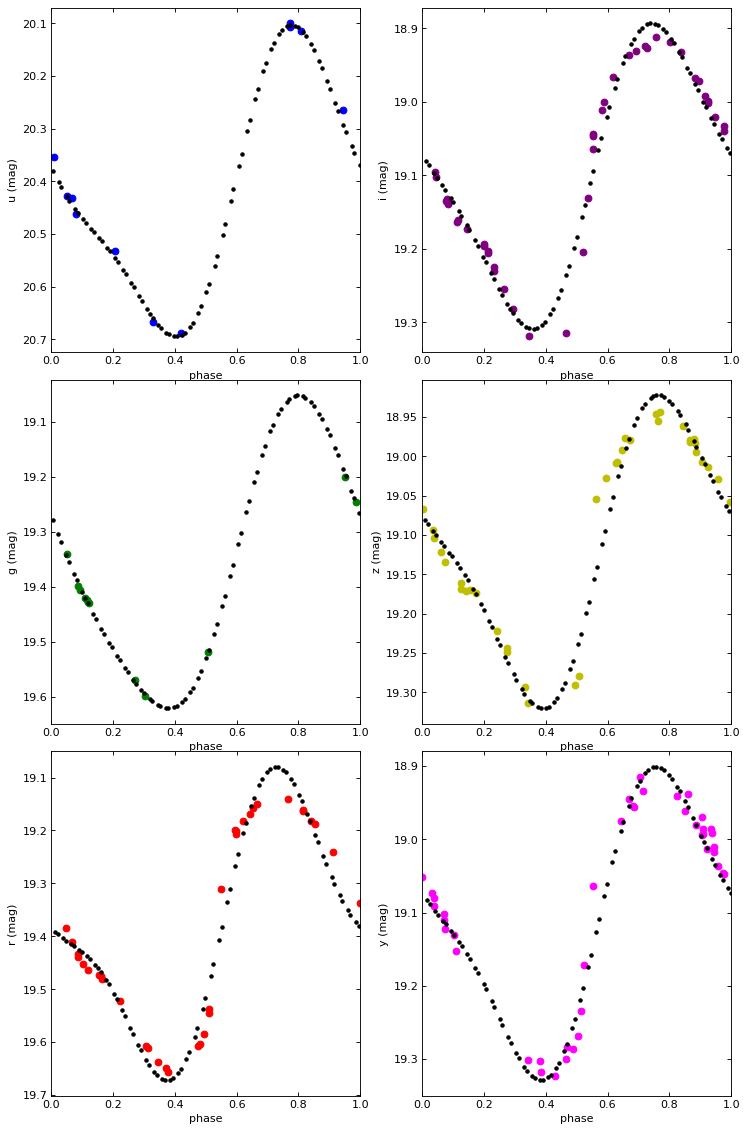

In [16]:
#This cell make the analysis of light curve phased with the recovered period and 
#with index=index_notsaturated with a given period 

#You can  change the period and use:
#Period that phase the light curve.(use LcTheoric['time'][0] as zero point as in the previous figures)
period=best_per_temp #or period_model or fitLS_multi.best_period

#Insert the number of harmonics of the model's fit (if NVisits =2*numberOfHarmonics+2 the metric skip to other band without doing  the fit)
numberOfHarmonics=2
#The  value that multiplyes the max distance from two consecutive phases of the light curve (used to count the gaps in  the LC)
factorForDimensionGap=0.5 
outDir=path3


#Use of LcFittingLAST!

finalResult=LcFittingLAST.computation(LcTeoLSST_noised,index_notsaturated,period,numberOfHarmonics,factorForDimensionGap,label,outDir)

#...and is useful to have all these information!!
print('Final results:')
print('<u>,<g>,<r>,<i>,<z>,<y>,=')
print(finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'])
print('<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=')
print(finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'])
print('Chi of the fit=')
print(finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'])

print('Max gap dimension (MGD)=')
print(finalResult['maxHoleDimension_u'],finalResult['maxHoleDimension_g'],finalResult['maxHoleDimension_r'],finalResult['maxHoleDimension_i'],finalResult['maxHoleDimension_z'],finalResult['maxHoleDimension_y'])
print('Number of gaps >'+ str(factorForDimensionGap)+'MGD =')
print(finalResult['numberOfHoles_u'],finalResult['numberOfHoles_g'],finalResult['numberOfHoles_r'],finalResult['numberOfHoles_i'],finalResult['numberOfHoles_z'],finalResult['numberOfHoles_y'])